# １０月４日

In [1]:
from IPython.display import Image
from IPython.core.display import display
import re
import warnings
warnings.filterwarnings('ignore')

# Libraries for machine Learning

#from sklearn.cross_validation import train_test_split # 訓練データとテストデータに分割
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix # 混合行列

from sklearn.decomposition import PCA #主成分分析
from sklearn.linear_model import LogisticRegression # ロジスティック回帰
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier # K近傍法
from sklearn.svm import SVC # サポートベクターマシン
from sklearn.tree import DecisionTreeClassifier # 決定木
from sklearn.ensemble import RandomForestClassifier # ランダムフォレスト
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier # AdaBoost
from sklearn.naive_bayes import GaussianNB # ナイーブ・ベイズ
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # Linear Discriminant Analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA # Quadratic Discriminant Analysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier

# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
# 図やグラフを図示するためのライブラリをインポートする。
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.tools import plotting

/opt/conda/envs/kcfconvoy/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
import kcfconvoy as kcf
kcfmat = kcf.KCFmat()

In [3]:
# Please download "br08007.keg" file by clicking "Download htext" link from https://www.genome.jp/kegg-bin/get_htext?br08007.keg
# and put it in the appropriate directory.
brite = './kegg/br08007.keg'

In [4]:
!date
alphabet = list('ABCDEFGHIJKLKMOPQRSTUVWXYZ')
hierarchy = {}
group = {}
_id = ''
with open(brite) as f:
    for line in f.readlines():
        head = line[0:1]
        if head in alphabet:
            if head not in hierarchy.keys():
                hierarchy[head] = ''
            if re.search(r'[CD]\d{5}', line):
                _id = line.split()[1]
                #print(_id)
                kcfmat.input_from_kegg(_id, name=_id)
            else:
                hierarchy[head] = line[1:].strip()
            for level, name in hierarchy.items():
                key = level + ":" + name
                if key not in group.keys():
                    group[key] = []
                group[key].append(_id)
!date

Thu Oct 11 09:20:41 UTC 2018
error  C15231
error  C15225
error  C18144
error  C18674
error  C15470
error  C19040
Thu Oct 11 09:31:24 UTC 2018


In [5]:
len(kcfmat.cpds)

918

In [6]:
len(kcfmat.kcf_vecs)

918

In [7]:
group_names = sorted(list(group.keys()))
for i, group_name in enumerate(group_names):
    if len(group[group_name]) < 10:
        continue
    print(i, group_name, len(group[group_name]))

0 A:<b>Obsolete pesticides</b> 313
1 A:<b>Pesticides</b> 741
2 B:Fungicides 240
3 B:Herbicides 365
4 B:Insect growth regulators 30
5 B:Insecticides 299
6 B:Others 33
7 B:Plant growth regulators 51
8 B:Rodenticides 35
9 C:Acaricides 44
11 C:Amide fungicides 39
12 C:Amide herbicides 25
13 C:Anilide herbicides 26
14 C:Antibiotic fungicides 10
18 C:Auxins 11
19 C:Benzoic acid herbicides 15
22 C:Carbamate fungicides 12
23 C:Carbamate insecticide 11
24 C:Carbamate insecticides 25
25 C:Carbanilate herbicides 11
26 C:Chitin synthesis inhibitors 12
27 C:Conazole fungicides 31
29 C:Coumarin rodenticides 11
32 C:Dicarboximide fungicides 13
33 C:Dinitroaniline herbicides 13
36 C:Dithiocarbamate fungicides 14
39 C:Growth inhibitors / retardants 15
45 C:Insect repellents 11
57 C:Organochlorine insecticides 20
59 C:Organophosphorus fungicides 10
60 C:Organophosphorus herbicides 11
61 C:Organophosphorus insecticides 108
63 C:Others 185
64 C:Phenoxy herbicides 23
65 C:Phenylurea herbicides 27
69 C:Pyre

In [8]:
group_names[3]

'B:Herbicides'

In [9]:
group

{'A:<b>Pesticides</b>': ['',
  '',
  '',
  'C18498',
  'C18723',
  'C18568',
  'C18568',
  'C18581',
  'C10929',
  'C18547',
  'C11255',
  'C10932',
  'C18573',
  'C18516',
  'C18820',
  'C18518',
  'C18833',
  'C18593',
  'C18519',
  'C18464',
  'C18521',
  'C18502',
  'C10941',
  'C18503',
  'C18522',
  'C18548',
  'C18626',
  'C18800',
  'C18753',
  'C10956',
  'C18480',
  'C18482',
  'C11182',
  'C18550',
  'C18899',
  'C10960',
  'C18903',
  'C18903',
  'C02010',
  'C17968',
  'C08073',
  'C06624',
  'C00413',
  'C12112',
  'C12112',
  'C10896',
  'C18415',
  'C10897',
  'C11077',
  'C18866',
  'C18421',
  'C18885',
  'C14432',
  'C14432',
  'C18701',
  'C18704',
  'C18459',
  'C18456',
  'C18720',
  'C18739',
  'C18461',
  'C18733',
  'C18734',
  'C18466',
  'C18468',
  'C18471',
  'C18476',
  'C18477',
  'C18572',
  'C18801',
  'C11121',
  'C18888',
  'C18544',
  'C18489',
  'C18490',
  'C11156',
  'C11127',
  'C18493',
  'C18815',
  'C18494',
  'C18494',
  'C18712',
  'C18713',

In [10]:
classes = [1 if id in group[group_names[3]] else 0 for id in kcfmat.names]

In [11]:
print(classes)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [12]:
class Classifiers:
    def __init__(self):
        self.classifiers = [
            ["Logistic Regression", LogisticRegression()],
            ["Stochastic Gradient Descent", SGDClassifier()],
            ["Nearest Neighbors", KNeighborsClassifier()],
            ["Linear SVM", SVC(kernel="linear")],
            ["Polynomial SVM", SVC(kernel="poly")],
            ["RBF SVM", SVC(kernel="rbf")],
            ["Sigmoid SVM", SVC(kernel="sigmoid")],
            ["Decision Tree", DecisionTreeClassifier()],
            ["Random Forest", RandomForestClassifier()],
            ["Extra Tree", ExtraTreesClassifier()],
            ["Gradient Boosting", GradientBoostingClassifier()],
            ["AdaBoost", AdaBoostClassifier()],
            ["Naive Bayes", GaussianNB()],
            ["TSNE", TSNE()],
            ["Linear Discriminant Analysis", LDA()],
            ["Quadratic Discriminant Analysis", QDA()],
            ["Gaussian Process", GaussianProcessClassifier()],
            ["Multi-Layer Perceptron", MLPClassifier()]
        ]

PatternFingerprint , length=  1024
Thu Oct 11 09:31:32 UTC 2018
Thu Oct 11 09:34:59 UTC 2018


,train,train_err,test,test_err
classifier,,,,
Multi-Layer Perceptron,1.000000,0.000000,0.814674,0.013605
Extra Tree,1.000000,0.000000,0.811141,0.022381
Gradient Boosting,0.968364,0.007579,0.798641,0.019404
Logistic Regression,0.995091,0.002108,0.795924,0.017585
Random Forest,0.989091,0.003833,0.795109,0.020663
Gaussian Process,1.000000,0.000000,0.791576,0.023201
Nearest Neighbors,0.849273,0.012610,0.767663,0.026478
Linear SVM,0.999273,0.000939,0.765217,0.012823
AdaBoost,0.884182,0.009623,0.762772,0.019345


LayeredFingerprint , length=  2048
Thu Oct 11 09:35:20 UTC 2018
Thu Oct 11 09:40:21 UTC 2018


,train,train_err,test,test_err
classifier,,,,
Gaussian Process,0.999636,0.000767,0.822826,0.016544
Multi-Layer Perceptron,0.999636,0.000767,0.820652,0.014606
Logistic Regression,0.998364,0.001592,0.817120,0.008693
Extra Tree,0.999636,0.000767,0.816033,0.019888
Random Forest,0.989818,0.005157,0.811957,0.019292
Gradient Boosting,0.977091,0.005157,0.802989,0.018968
Linear SVM,0.999636,0.000767,0.796739,0.014817
Nearest Neighbors,0.856182,0.008061,0.795924,0.024083
Stochastic Gradient Descent,0.936000,0.033160,0.790761,0.024607


RDKFingerprint , length=  2048
Thu Oct 11 09:40:43 UTC 2018
Thu Oct 11 09:46:06 UTC 2018


,train,train_err,test,test_err
classifier,,,,
Gaussian Process,0.998909,0.000939,0.828533,0.016277
Multi-Layer Perceptron,0.998909,0.000939,0.821739,0.016712
Logistic Regression,0.998909,0.000939,0.816304,0.017573
Gradient Boosting,0.988364,0.002300,0.814130,0.023662
Stochastic Gradient Descent,0.972364,0.009498,0.804076,0.026792
Linear SVM,0.998909,0.000939,0.797554,0.018838
Extra Tree,0.998909,0.000939,0.797283,0.016314
Nearest Neighbors,0.848364,0.009318,0.785054,0.013644
Random Forest,0.988364,0.004038,0.776630,0.024733


MorganFingerprint , length=  2048
Thu Oct 11 09:46:22 UTC 2018
Thu Oct 11 09:51:09 UTC 2018


,train,train_err,test,test_err
classifier,,,,
Multi-Layer Perceptron,1.000000,0.000000,0.837772,0.022701
Gaussian Process,1.000000,0.000000,0.837772,0.019471
Logistic Regression,0.998727,0.001725,0.833696,0.015037
Linear SVM,1.000000,0.000000,0.833152,0.015647
Extra Tree,1.000000,0.000000,0.819022,0.022598
Stochastic Gradient Descent,0.981818,0.012538,0.809511,0.017817
Random Forest,0.986364,0.004635,0.805707,0.020745
Gradient Boosting,0.953455,0.008185,0.791848,0.015329
Nearest Neighbors,0.857455,0.012661,0.788043,0.024204


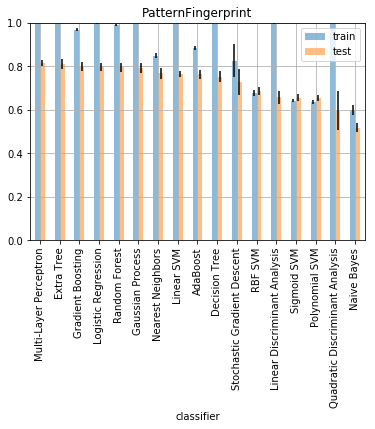

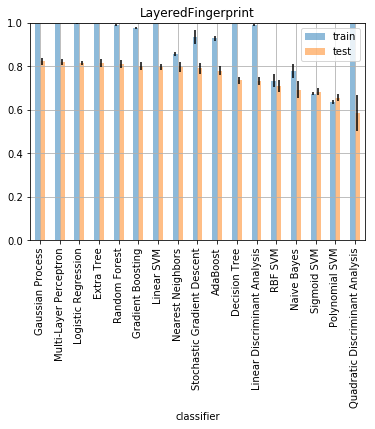

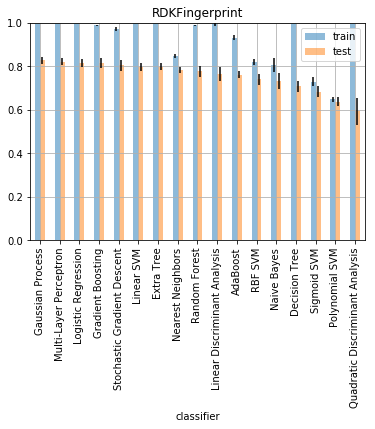

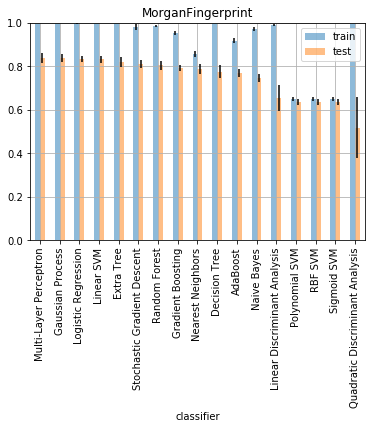

In [13]:
fingerprints = ["PatternFingerprint", "LayeredFingerprint", "RDKFingerprint", "MorganFingerprint"]
for fingerprint in fingerprints:
    kcfmat.calc_fingerprints(fingerprint=fingerprint)
    X = [[int(fp.ToBitString()[i:i+1]) for i in range(len(fp.ToBitString()))] for fp in kcfmat.fps]
    y = classes
    print(fingerprint, ", length= ", len(X[0]))

    !date
    result = []
    for trial in range(10): # 10 回繰り返す
        clfs = Classifiers()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4) # 訓練データ・テストデータの生成
        for name, clf in clfs.classifiers: # 指定した複数の分類機を順番に呼び出す
            try:
                clf.fit(X_train, y_train) # 学習
                score1 = clf.score(X_train, y_train) # 正解率（train）の算出
                score2 = clf.score(X_test, y_test) # 正解率（test）の算出
                result.append([name, score1, score2]) # 結果の格納
            except:
                continue

    df_result = pd.DataFrame(result, columns=['classifier', 'train', 'test']) # 今回はまだ並べ替えはしない
    !date
    # 分類器 (classifier) 毎にグループ化して正解率の平均を計算し、test の正解率の平均の大きい順に並べる
    df_result_mean = df_result.groupby('classifier').mean() #.sort_values('test', ascending=False)
    # エラーバーの表示に用いる目的で、標準偏差を計算する
    errors = df_result.groupby('classifier').std()
    errors.columns=['train_err', 'test_err']
    
    # 平均値と標準偏差を用いて棒グラフを描画
    display(pd.concat([df_result_mean['train'], errors['train_err'], df_result_mean['test'], errors['test_err']], axis=1).sort_values('test', ascending=False))
    df_result_mean = df_result_mean.sort_values('test', ascending=False)
    errors.columns=['train', 'test']
    df_result_mean.plot(title=fingerprint, kind='bar', alpha=0.5, grid=True, yerr=errors, ylim=[0, 1])

In [14]:
!date
kcfmat.calc_kcf_matrix()
!date

Thu Oct 11 09:51:11 UTC 2018
Thu Oct 11 09:55:42 UTC 2018


In [15]:
X = kcfmat.mat
y = classes

In [16]:
!date
accum_feature_importances_ = np.zeros(len(kcfmat.mat[0]))
for trial in range(10): # 10 回繰り返す
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4) # 訓練データ・テストデータの生成
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train) # 学習
    accum_feature_importances_ += clf.feature_importances_
!date

Thu Oct 11 09:55:43 UTC 2018
Thu Oct 11 09:56:13 UTC 2018


In [17]:
ranking_feature_importances_ = np.argsort(accum_feature_importances_)[::-1]

In [18]:
selected_features = []
corrcoef_threshold = 0.8
max_features = 2048
for feature_idx in ranking_feature_importances_:
    if len(selected_features) == 0:
        selected_features.append(feature_idx)
    else:
        selected_flag = True
        for feature_idx2 in selected_features:
            corrcoef = np.corrcoef(kcfmat.mat.T[feature_idx], kcfmat.mat.T[feature_idx2])[0][1]
            if corrcoef > corrcoef_threshold:
                selected_flag = False
                break
        if selected_flag:
            selected_features.append(feature_idx)
    if len(selected_features) == max_features:
        break

In [19]:
X = kcfmat.mat[:, selected_features]
y = classes

Thu Oct 11 10:00:05 UTC 2018
Thu Oct 11 10:04:37 UTC 2018


,train,train_err,test,test_err
classifier,,,,
Multi-Layer Perceptron,0.997091,0.001757,0.848370,0.019795
Extra Tree,0.997455,0.001954,0.842120,0.013942
Logistic Regression,0.996000,0.002064,0.828261,0.022069
Gaussian Process,0.997091,0.001954,0.826630,0.015200
Random Forest,0.986727,0.005146,0.825543,0.013665
Gradient Boosting,0.971455,0.007669,0.823641,0.017397
Linear SVM,0.997091,0.001757,0.813859,0.016763
Linear Discriminant Analysis,0.997455,0.001954,0.804891,0.024866
AdaBoost,0.945455,0.010249,0.802446,0.016851


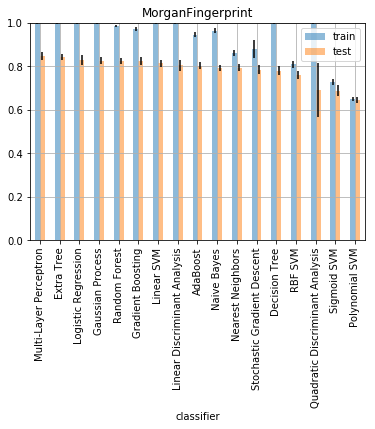

In [20]:
!date
result = []
for trial in range(10): # 10 回繰り返す
    clfs = Classifiers()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4) # 訓練データ・テストデータの生成
    for name, clf in clfs.classifiers: # 指定した複数の分類機を順番に呼び出す
        try:
            clf.fit(X_train, y_train) # 学習
            score1 = clf.score(X_train, y_train) # 正解率（train）の算出
            score2 = clf.score(X_test, y_test) # 正解率（test）の算出
            result.append([name, score1, score2]) # 結果の格納
        except:
            continue

df_result = pd.DataFrame(result, columns=['classifier', 'train', 'test']) # 今回はまだ並べ替えはしない
!date
# 分類器 (classifier) 毎にグループ化して正解率の平均を計算し、test の正解率の平均の大きい順に並べる
df_result_mean = df_result.groupby('classifier').mean() #.sort_values('test', ascending=False)
# エラーバーの表示に用いる目的で、標準偏差を計算する
errors = df_result.groupby('classifier').std()
errors.columns=['train_err', 'test_err']

# 平均値と標準偏差を用いて棒グラフを描画
display(pd.concat([df_result_mean['train'], errors['train_err'], df_result_mean['test'], errors['test_err']], axis=1).sort_values('test', ascending=False))
df_result_mean = df_result_mean.sort_values('test', ascending=False)
errors.columns=['train', 'test']
df_result_mean.plot(title=fingerprint, kind='bar', alpha=0.5, grid=True, yerr=errors, ylim=[0, 1])

In [21]:
selected_features = []
corrcoef_threshold = 0.8
max_features = 1024
for feature_idx in ranking_feature_importances_:
    if len(selected_features) == 0:
        selected_features.append(feature_idx)
    else:
        selected_flag = True
        for feature_idx2 in selected_features:
            corrcoef = np.corrcoef(kcfmat.mat.T[feature_idx], kcfmat.mat.T[feature_idx2])[0][1]
            if corrcoef > corrcoef_threshold:
                selected_flag = False
                break
        if selected_flag:
            selected_features.append(feature_idx)
    if len(selected_features) == max_features:
        break

In [22]:
X = kcfmat.mat[:, selected_features]
y = classes

Thu Oct 11 10:05:43 UTC 2018
Thu Oct 11 10:08:40 UTC 2018


,train,train_err,test,test_err
classifier,,,,
Multi-Layer Perceptron,0.996182,0.001032,0.858967,0.027458
Extra Tree,0.996727,0.000767,0.852989,0.022241
Random Forest,0.985818,0.005987,0.839130,0.026650
Logistic Regression,0.994364,0.001342,0.838043,0.024278
Gaussian Process,0.996545,0.000575,0.836413,0.021002
Gradient Boosting,0.967091,0.006496,0.827717,0.024747
Linear SVM,0.994727,0.001032,0.819022,0.028935
Naive Bayes,0.977273,0.006542,0.817391,0.019545
AdaBoost,0.938545,0.009063,0.809511,0.024049


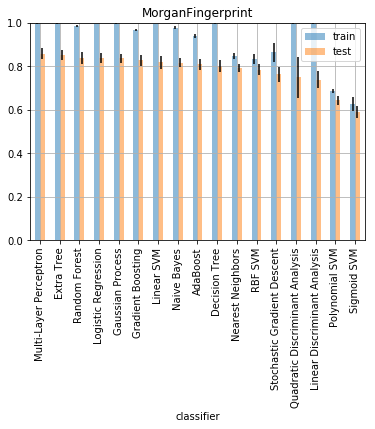

In [23]:
!date
result = []
for trial in range(10): # 10 回繰り返す
    clfs = Classifiers()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4) # 訓練データ・テストデータの生成
    for name, clf in clfs.classifiers: # 指定した複数の分類機を順番に呼び出す
        try:
            clf.fit(X_train, y_train) # 学習
            score1 = clf.score(X_train, y_train) # 正解率（train）の算出
            score2 = clf.score(X_test, y_test) # 正解率（test）の算出
            result.append([name, score1, score2]) # 結果の格納
        except:
            continue

df_result = pd.DataFrame(result, columns=['classifier', 'train', 'test']) # 今回はまだ並べ替えはしない
!date
# 分類器 (classifier) 毎にグループ化して正解率の平均を計算し、test の正解率の平均の大きい順に並べる
df_result_mean = df_result.groupby('classifier').mean() #.sort_values('test', ascending=False)
# エラーバーの表示に用いる目的で、標準偏差を計算する
errors = df_result.groupby('classifier').std()
errors.columns=['train_err', 'test_err']

# 平均値と標準偏差を用いて棒グラフを描画
display(pd.concat([df_result_mean['train'], errors['train_err'], df_result_mean['test'], errors['test_err']], axis=1).sort_values('test', ascending=False))
df_result_mean = df_result_mean.sort_values('test', ascending=False)
errors.columns=['train', 'test']
df_result_mean.plot(title=fingerprint, kind='bar', alpha=0.5, grid=True, yerr=errors, ylim=[0, 1])

In [44]:
m = kcfmat.cpds[0].mol

In [45]:
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

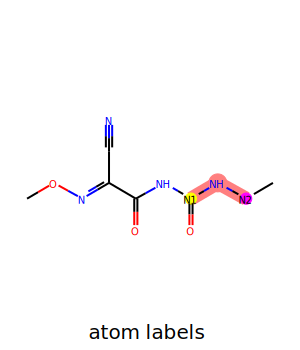

In [47]:
atoms = [6,7, 8]
colors = {6: (1,1,0), 8: (1,0,1)}
radius = {6: 0.25, 8: 0.25}
 
view = rdMolDraw2D.MolDraw2DSVG(300,350)
tm = rdMolDraw2D.PrepareMolForDrawing(m)
view.SetFontSize(0.9*view.FontSize())
option = view.drawOptions()
option.atomLabels[6] = 'N1'
option.atomLabels[8] = 'N2'
option.multipleBondOffset=0.07
option.padding=0.11
option.legendFontSize=20
view.DrawMolecule(tm, highlightAtoms=atoms,
                  highlightAtomColors=colors,
                  highlightAtomRadii=radius,
                  legend='atom labels')
view.FinishDrawing()
svg = view.GetDrawingText()
with open('./example_02.svg', 'w') as f:
    f.write(svg)
SVG(svg.replace('svg:', ''))